<a href="https://colab.research.google.com/github/gnani321/basic-ds-/blob/main/Decesion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# Exploratory Data Analysis:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
data.isna().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
data['oldpeak']=data['oldpeak'].fillna(data['oldpeak'].mean())

In [ ]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
#checkng for ouliers
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
numerical_col=data.select_dtypes(include=np.number).columns
categorical_col=data.select_dtypes(exclude=np.number).columns
numerical_col


Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

In [ ]:
categorical_col

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

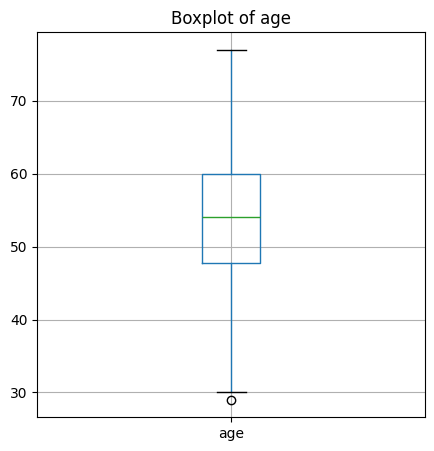

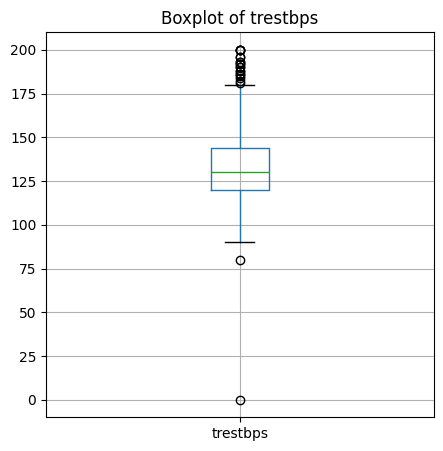

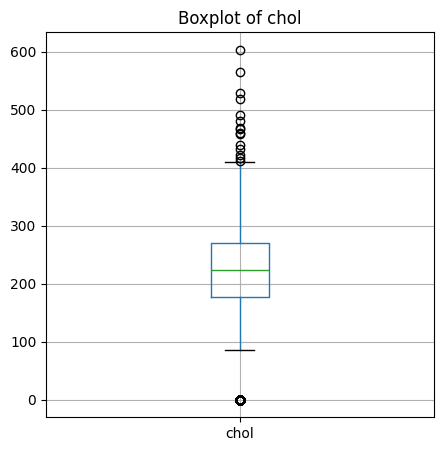

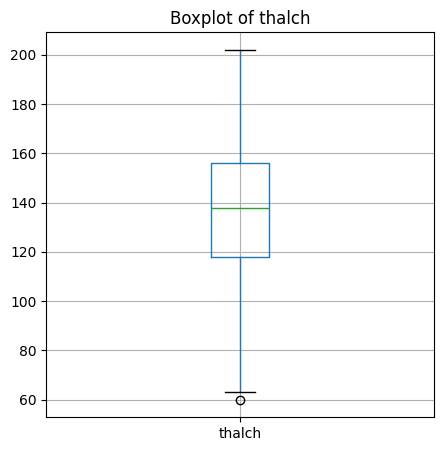

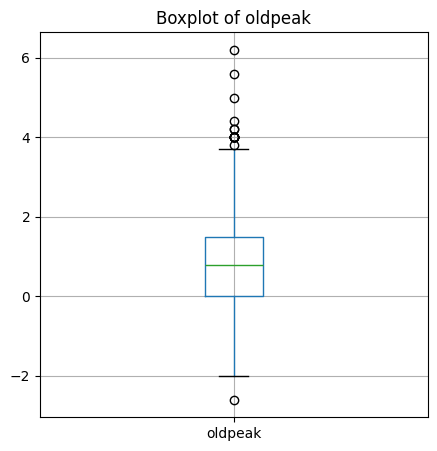

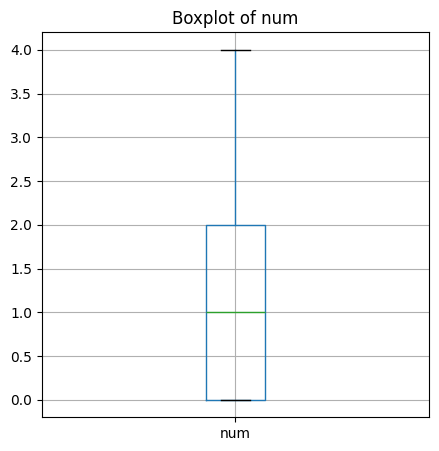

In [ ]:
#checking for outliers
import matplotlib.pyplot as plt
for col in numerical_col:
  plt.figure(figsize=(5,5))
  data.boxplot([col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [ ]:
#check for unique columns
for col in categorical_col:
  print(f'{col} has {data[col].unique()} values')

sex has ['Male' 'Female'] values
cp has ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal'] values
fbs has [ True False] values
restecg has ['lv hypertrophy' 'normal' 'st-t abnormality'] values
exang has [False True 'FALSE' 'TURE'] values
slope has ['downsloping' 'flat' 'upsloping'] values
thal has ['fixed defect' 'normal' 'reversable defect'] values


<Axes: >

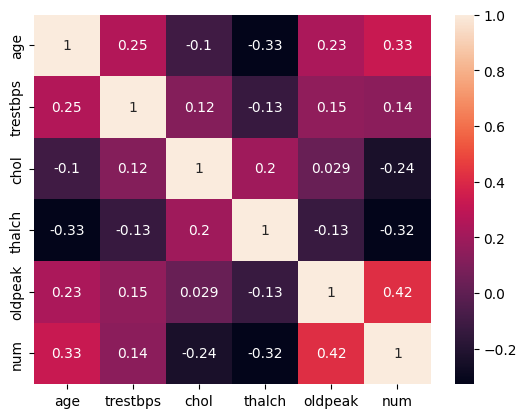

In [ ]:
import seaborn as sns
sns.heatmap(data[numerical_col].corr(),annot=True)

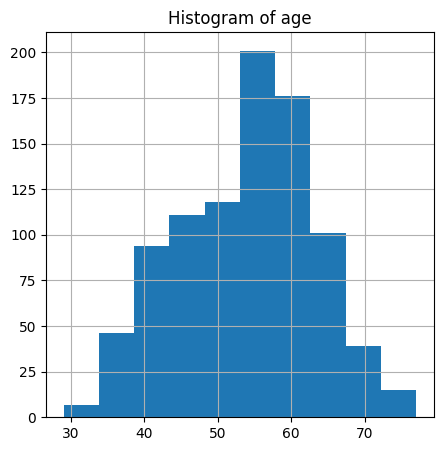

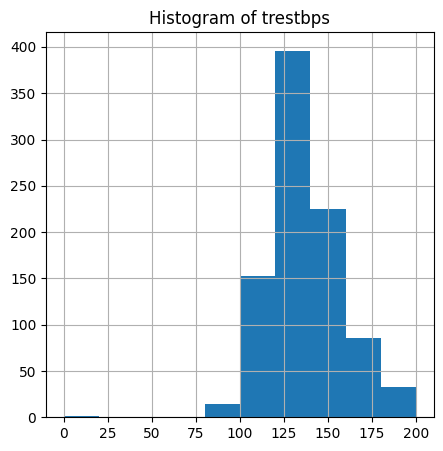

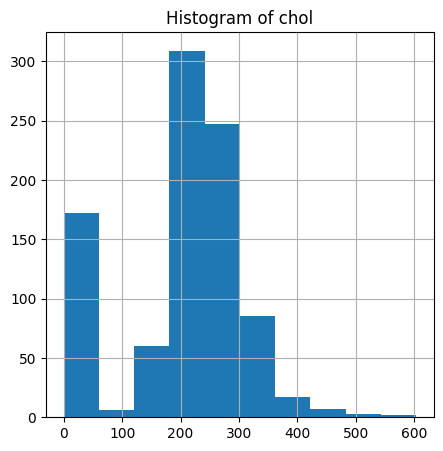

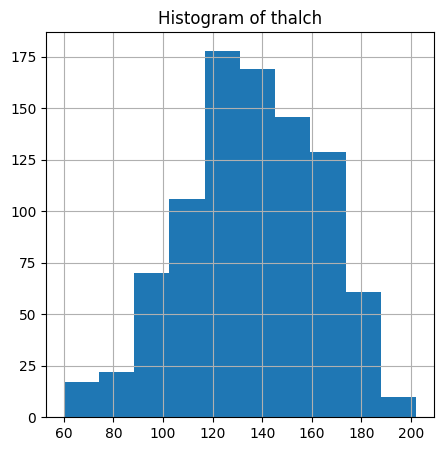

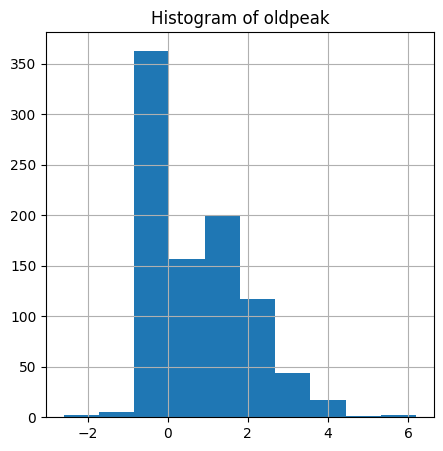

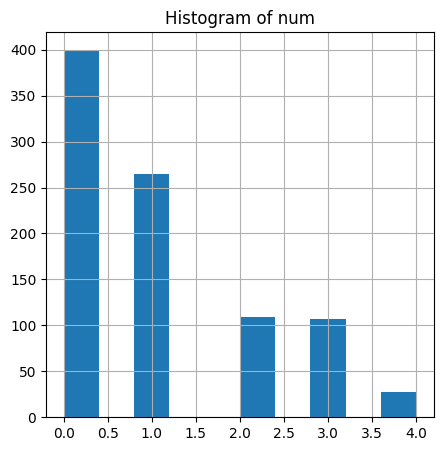

In [ ]:
#histogram of numerical features
for col in numerical_col:
  plt.figure(figsize=(5,5))
  data[col].hist()
  plt.title(f'Histogram of {col}')
  plt.show()

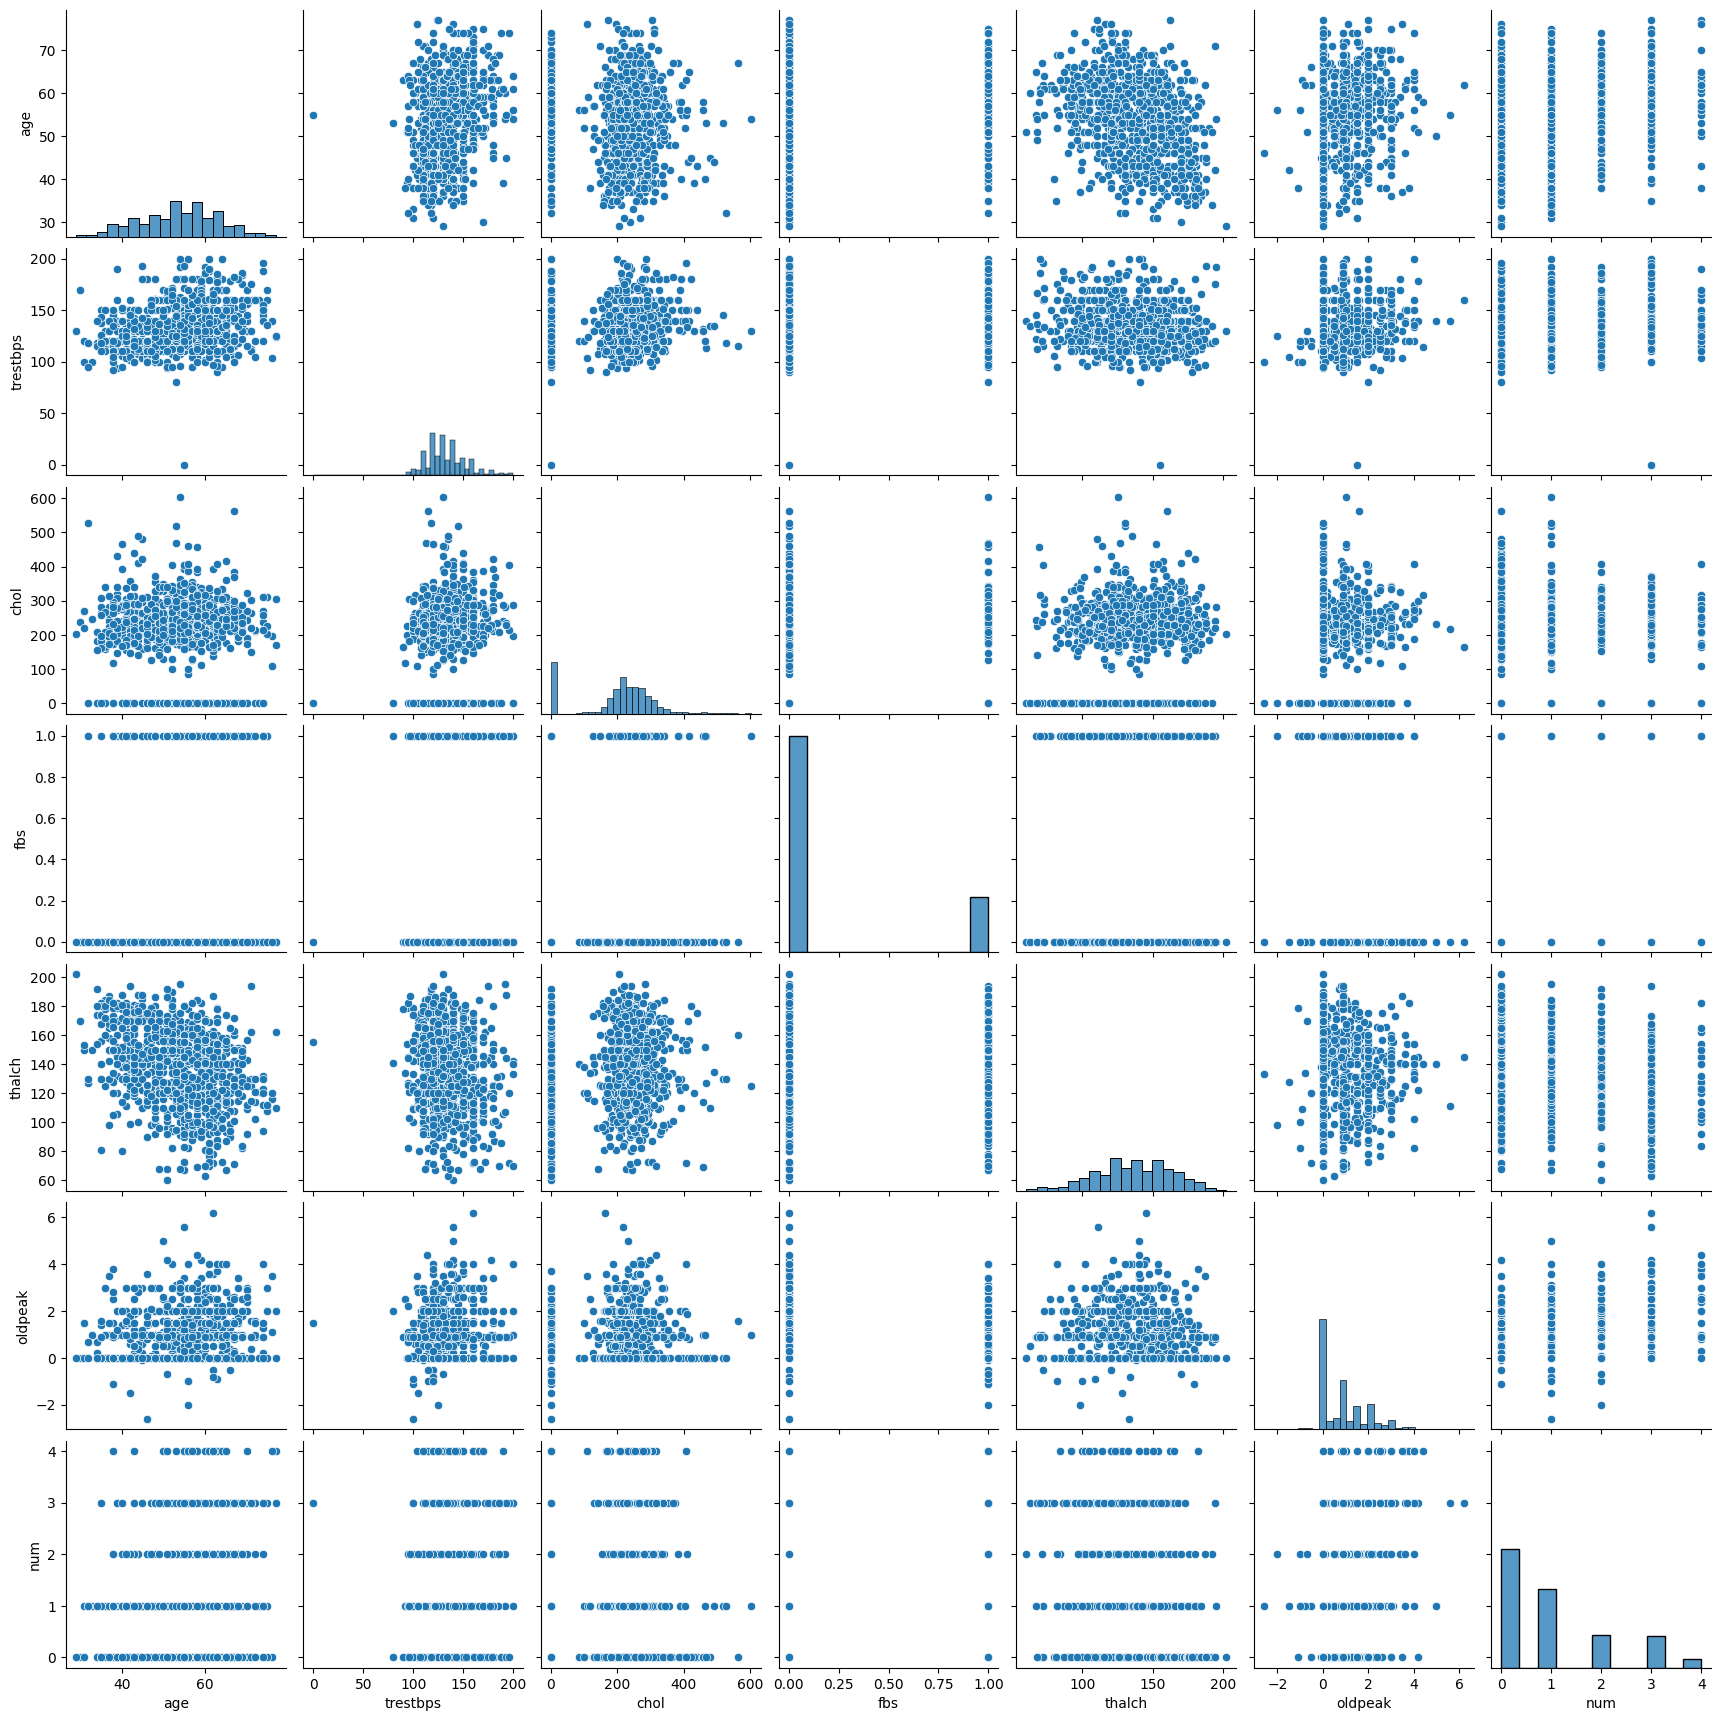

In [ ]:
sns.pairplot(data)

# Feature Engineering:

In [ ]:
#encoding categorial variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_col:
  data[col]=data[col].astype(str)
  data[col]=le.fit_transform(data[col])

In [ ]:
#scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[numerical_col]=scaler.fit_transform(data[numerical_col])

# Decision Tree Classification:

In [ ]:
data.restecg.value_counts()

,count
restecg,
1,542
0,187
2,179


In [ ]:

#Split the dataset into training and testing sets (e.g., using an 80-20 split).
from sklearn import tree
from sklearn.model_selection import train_test_split






In [ ]:
x=data.drop('restecg',axis=1)
y=data['restecg']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#intiliaze and train a decesion tree classifier
dt_classifier=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[0] <= -0.141\nentropy = 1.379\nsamples = 726\nvalue = [148, 432, 146]'),
 Text(0.25, 0.625, 'x[4] <= -0.326\nentropy = 1.118\nsamples = 286\nvalue = [38, 208, 40]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[6] <= 0.132\nentropy = 0.789\nsamples = 55\nvalue = [0, 42, 13]'),
 Text(0.0625, 0.125, 'entropy = 0.523\nsamples = 34\nvalue = [0, 30, 4]'),
 Text(0.1875, 0.125, 'entropy = 0.985\nsamples = 21\nvalue = [0, 12, 9]'),
 Text(0.375, 0.375, 'x[6] <= 0.188\nentropy = 1.133\nsamples = 231\nvalue = [38, 166, 27]'),
 Text(0.3125, 0.125, 'entropy = 1.023\nsamples = 88\nvalue = [6, 66, 16]'),
 Text(0.4375, 0.125, 'entropy = 1.129\nsamples = 143\nvalue = [32, 100, 11]'),
 Text(0.75, 0.625, 'x[6] <= 0.17\nentropy = 1.491\nsamples = 440\nvalue = [110.0, 224.0, 106.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 0.273\nentropy = 1.455\nsamples = 286\nvalue = [52, 150, 84]'),
 Text(0.5625, 0.125, 'entropy = 1.437\nsamples = 166\nvalue = [36, 92, 3

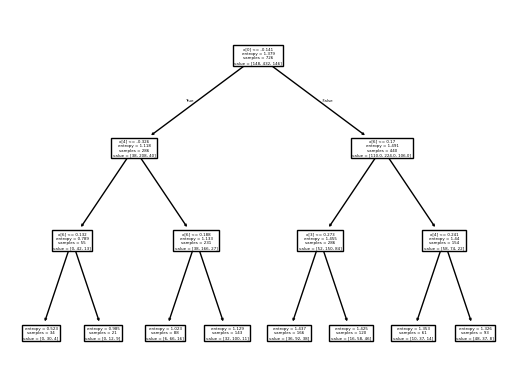

In [ ]:
import warnings
warnings.filterwarnings('ignore')
tree.plot_tree(dt_classifier)

In [ ]:
dt_classifier.feature_importances_

array([0.26507839, 0.        , 0.        , 0.06781601, 0.31906218,
       0.        , 0.34804343, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
feature_imp=pd.Series(dt_classifier.feature_importances_,index=x.columns)
feature_imp

,0
age,0.265078
sex,0.000000
cp,0.000000
trestbps,0.067816
chol,0.319062
fbs,0.000000
thalch,0.348043
exang,0.000000
oldpeak,0.000000
slope,0.000000


In [ ]:
# make predictions on test data
y_pred=dt_classifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1])

In [ ]:
pd.Series(y_pred).value_counts()

,count
1,161
0,21


In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1
restecg,,
0,8,31
1,12,98
2,1,32


In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5824175824175825

In [ ]:
#euvluate the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 8, 31,  0],
       [12, 98,  0],
       [ 1, 32,  0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.21      0.27        39
           1       0.61      0.89      0.72       110
           2       0.00      0.00      0.00        33

    accuracy                           0.58       182
   macro avg       0.33      0.37      0.33       182
weighted avg       0.45      0.58      0.49       182



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(x_test), multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")



ROC AUC Score: 0.6354126486192826


# Hyperparameter Tuning:

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[None,3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
# intilize
grid_search=GridSearchCV(estimator=tree.DecisionTreeClassifier(),
                         param_grid=param_grid,
                         cv=5,
                         scoring='accuracy',
                         n_jobs=-1)
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# print the hyperparameters
print("Best hyperparameters:",grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
#euvalte the model
best_dt_classifier=grid_search.best_estimator_
y_pred_best=best_dt_classifier.predict(x_test)
accuracy_best=accuracy_score(y_test,y_pred_best)
accuracy_best

0.5934065934065934

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred_best)

array([[10, 28,  1],
       [13, 97,  0],
       [ 1, 31,  1]])

In [ ]:
#classifiaction report
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.42      0.26      0.32        39
           1       0.62      0.88      0.73       110
           2       0.50      0.03      0.06        33

    accuracy                           0.59       182
   macro avg       0.51      0.39      0.37       182
weighted avg       0.56      0.59      0.52       182



In [ ]:
roc_auc_best = roc_auc_score(y_test, best_dt_classifier.predict_proba(x_test), multi_class='ovr')
print(f"ROC AUC Score of best model: {roc_auc_best}")

ROC AUC Score of best model: 0.6879830398286774


# Model Evaluation and Analysis:

In [ ]:
#model evaluation and analysis
print(f"Initial Model Accuracy: {accuracy}")
print(f"Best Model Accuracy: {accuracy_best}")

Initial Model Accuracy: 0.5824175824175825
Best Model Accuracy: 0.5934065934065934


In [ ]:
#compare the confusion matrix
print("Initial Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nBest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Initial Model Confusion Matrix:
[[ 8 31  0]
 [12 98  0]
 [ 1 32  0]]

Best Model Confusion Matrix:
[[10 28  1]
 [13 97  0]
 [ 1 31  1]]


In [ ]:
#comapre the classification report
print("Initial Model Classification Report:")
print(classification_report(y_test, y_pred))
print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))


Initial Model Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        39
           1       0.61      0.89      0.72       110
           2       0.00      0.00      0.00        33

    accuracy                           0.58       182
   macro avg       0.33      0.37      0.33       182
weighted avg       0.45      0.58      0.49       182


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.26      0.32        39
           1       0.62      0.88      0.73       110
           2       0.50      0.03      0.06        33

    accuracy                           0.59       182
   macro avg       0.51      0.39      0.37       182
weighted avg       0.56      0.59      0.52       182



In [ ]:

# Analyze ROC AUC scores
print(f"Initial Model ROC AUC Score: {roc_auc}")
print(f"Best Model ROC AUC Score: {roc_auc_best}")

Initial Model ROC AUC Score: 0.6354126486192826
Best Model ROC AUC Score: 0.6879830398286774


# 1. Visualizing the confusion matrices using heatmaps to better understand the types of errors made by each model.
# 2. Plotting ROC curves for both models to visualize their performance across different classification thresholds.
# 3. Examining the feature importances of both the initial and best models to see how the hyperparameter tuning affected the model's reliance on different features.
# 4. Performing cross-validation on both models to obtain a more robust estimate of their generalization performance.
# 5. Comparing the performance of the decision tree with other classification models.

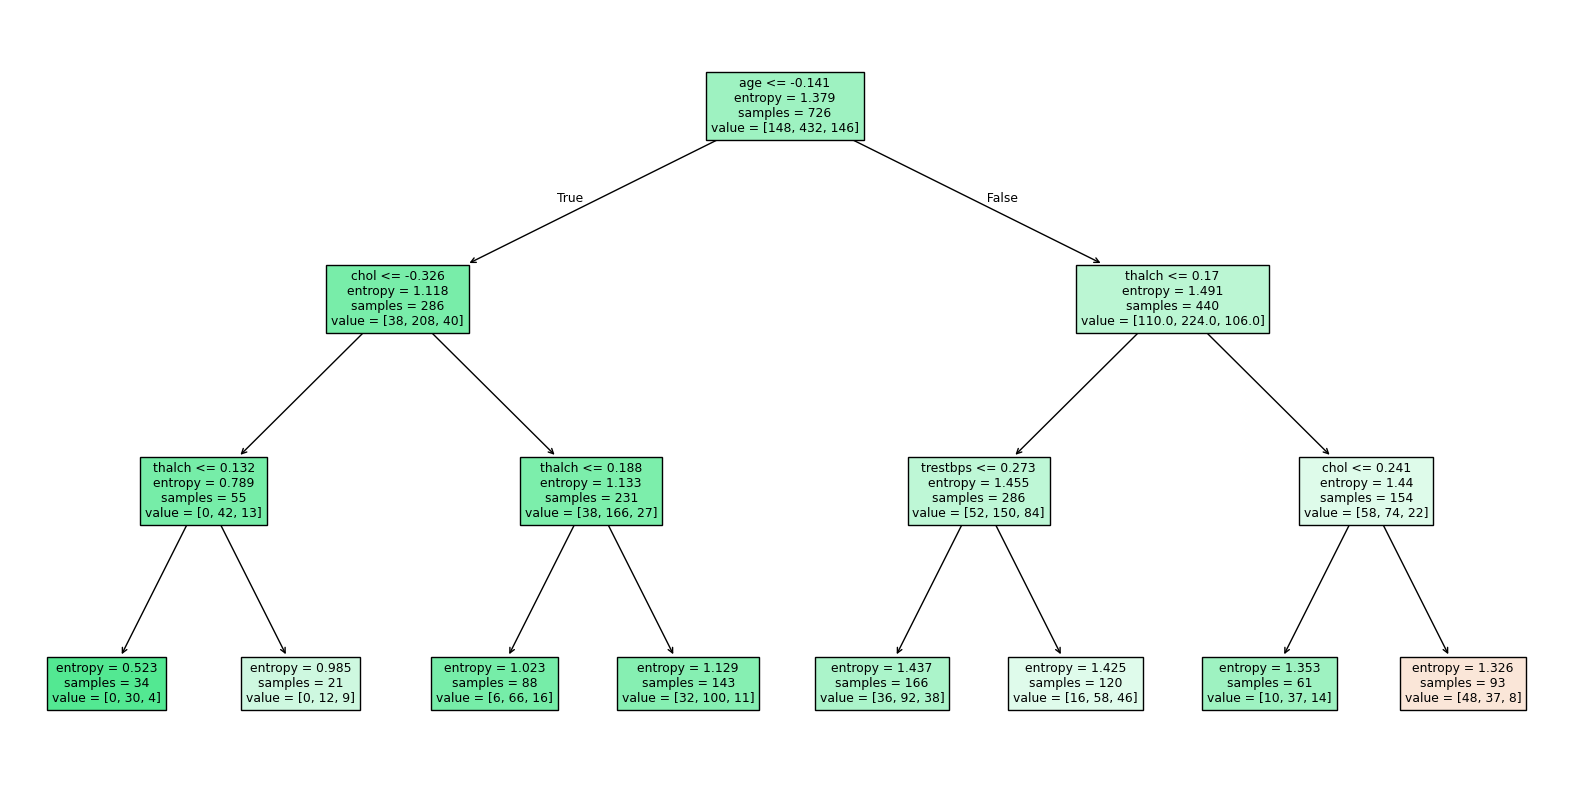

In [ ]:
# visulaize the decesion tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=x.columns)
plt.show()

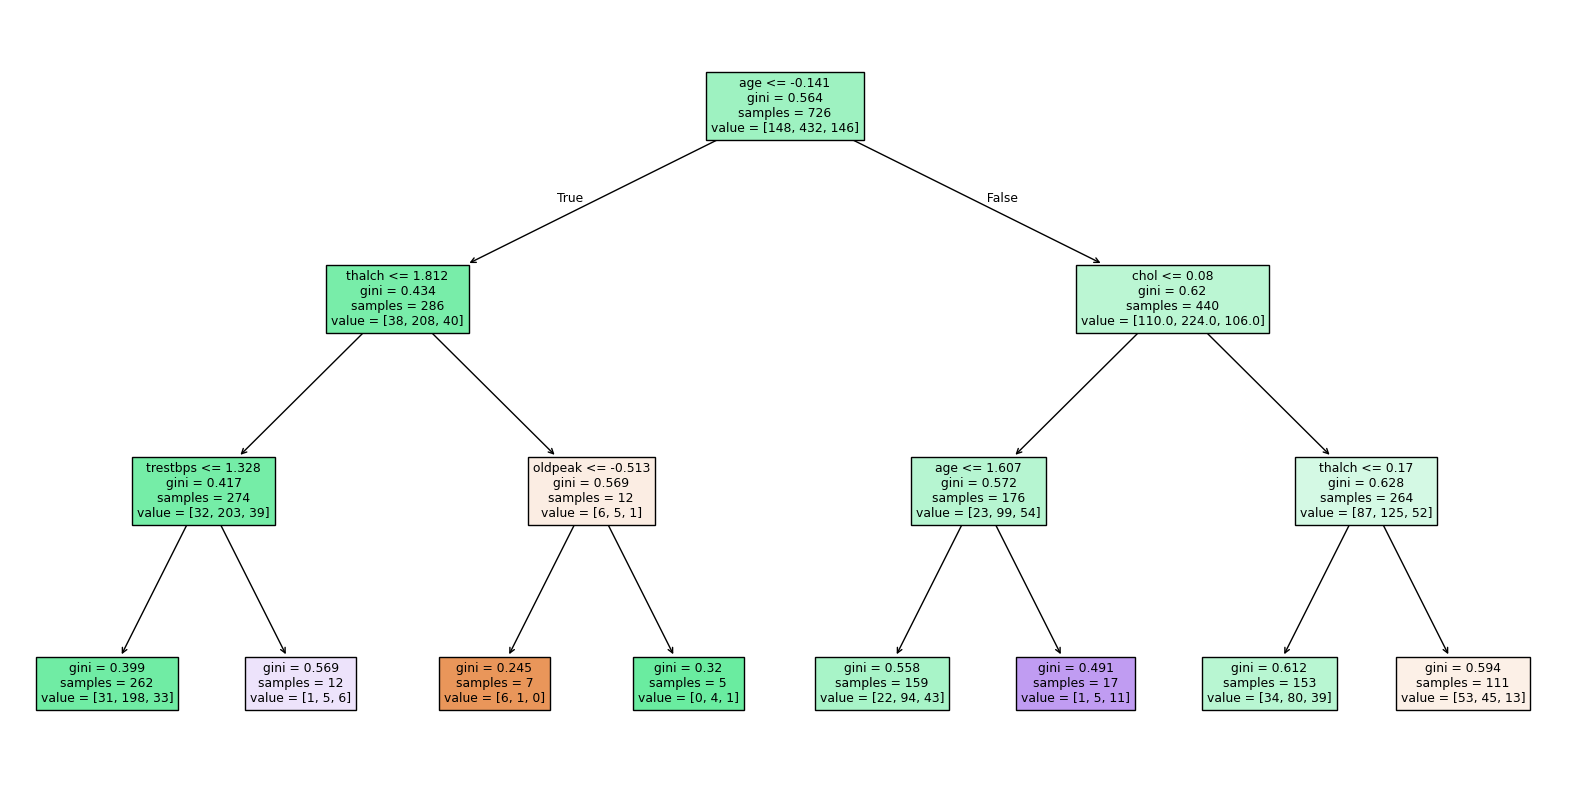

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt_classifier, filled=True, feature_names=x.columns)
plt.show()

# Interview Questions:

What are some common hyperparameters of decision tree models, and how do they affect the model's performance?


1.criterion:

  Defines the function to measure the quality of a split.

   Common options are 'gini' (Gini impurity) and 'entropy' (information gain).


   2. `max_depth`:

    The maximum depth of the tree.
        
  Controls the complexity of the model.  A deeper tree can capture more complex patterns but is more prone to overfitting (memorizing the training data).


  3.max_features:
     The number of features to consider when looking for the best split.
     A higher value can prevent the tree from creating very small leaf nodes, which again helps to prevent overfitting.


4.max-leaf nodes:               Limits the number of leaf nodes in the tree.  Useful for controlling the size and complexity of the model.
    


    


      


              




    


         
         
        


2.What is the difference between the Label encoding and One-hot encoding?
    



#Label Encoding:
Assigns a unique integer to each category in a categorical feature.
 Suitable for ordinal categorical features where the order matters (e.g., low, medium, high).
 Can introduce unintended ordinal relationships if the categories don't have a natural order.




 # One-Hot Encoding:
 Creates new binary features for each category in a categorical feature.
 Suitable for nominal categorical features where the order doesn't matter.
 Avoids introducing unintended ordinal relationships.
 Can lead to a high-dimensional feature space if the categorical feature has many categories